In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


750/750 [==============================] - 3s 3ms/step - loss: 0.3338 - accuracy: 0.9056 - val_loss: 0.1802 - val_accuracy: 0.9490
Epoch 2/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1548 - accuracy: 0.9560 - val_loss: 0.1356 - val_accuracy: 0.9601
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1087 - accuracy: 0.9690 - val_loss: 0.1081 - val_accuracy: 0.9678
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0819 - accuracy: 0.9764 - val_loss: 0.1046 - val_accuracy: 0.9685
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0629 - accuracy: 0.9820 - val_loss: 0.1044 - val_accuracy: 0.9680


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0952 - accuracy: 0.9714
Test accuracy: 0.9714000225067139


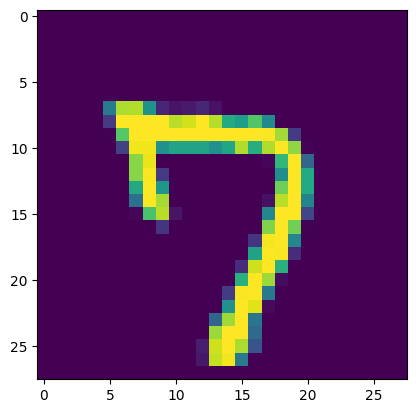

313/313 [==============================] - 1s 3ms/step
The Predicted class is: 7


In [22]:
import random
import matplotlib.pyplot as plt
import numpy as np
n = random.randint(0, 9999)
plt.imshow(test_images[n])
plt.show()
predicted_value = model.predict(test_images)
predicted_classes = np.argmax(predicted_value, axis=1)
# print(test_labels[n])
print('The Predicted class is:',predicted_classes[n])

plt.show()